In [ ]:
import os
import tweepy as tw
import pandas as pd
from bs4 import BeautifulSoup
import pickle


auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
India_id=23424848;
result=api.trends_place(India_id);
trendlist=[];
for i in result[0]['trends']:
  trendlist.append(i['name']);
  print(i['name']);

#ShameOnKejriwal
#WorldBookDay
#ModiOxygenDo
#FalconAndWinterSoldierFinale
#hbdvespa75
JASLY HITS 1M POSTS ON IG
PM-CM
Breaking Osho Laxmi
No One Saw Sushant Hanging
DCGI
jungkook
Captain America
23rd of April
CM of Delhi
Shri Narendra Modi
AFTV
Sharon
Bucky
IITian
hobi
Bandish Bandits
Dushyant Dave
Ma Laxmi
Arnab
kim namjoon
Louis Vuitton
Germany
Nana
Indian Air Force
Chief Ministers
bighit
Central Vista
Hooda
Rahul Mittra
hoseok
BTS WORLD DOMINATION
#BanglaAcheModiJirSathe
#ईद_राधे_की
#ModiAbandonedIndia
#Protocol
#OxygenCrisis
#JasLyiansKiJaanJasLy
#हम_जीतेंगे_कोरोना_हारेगा
#COVIDEmergency2021
#भाषणबाज_मोदी
#AmitMistry
#Virafin
#MIvsPBKS
#BLACKPINKFourthBillion
#FashionLeagueByMyntra


In [ ]:
import pickle

In [ ]:
q1=trendlist[0];
trends=[];
for i in tw.Cursor(api.search, q=q1).items(2000):
  trends.append(i);
count=0;
with open('trends.pickle', 'wb') as write:
    pickle.dump(trends, write, protocol=pickle.HIGHEST_PROTOCOL)
    

In [ ]:
with open('trends.pickle', 'rb') as read: #reading the saved dict 
     trends = pickle.load(read)

In [ ]:
top10={};toplikes={};topretweet={};
trendingtweet=[];
for i in trends:
  text=i.text;
  val=[];
  val.append(i.id_str);val.append(i.text);
  trendingtweet.append(val);
  
  text=text.split(" ");
  for j in text:
    if(len(j)>0 and j[0]=='#'):
      j=j.lower();
      if(j not in top10.keys()):
        top10[j]=0;
      top10[j]+=1;
      if(j not in toplikes.keys()):
        toplikes[j]=0;
      toplikes[j]+=i.favorite_count;
      if(j not in topretweet.keys()):
        topretweet[j]=0;
      topretweet[j]+=i.retweet_count;

sortedtop10=sorted(top10.items(),reverse=True,key=lambda item: item[1]);
print(sortedtop10[1:11])

toplikes=sorted(toplikes.items(),reverse=True,key=lambda item: item[1]);
print(toplikes[1:11])


topretweet=sorted(topretweet.items(),reverse=True,key=lambda item: item[1]);
print(topretweet[1:11])

[('#worldbookday.', 110), ('#books', 77), ('#iraq,', 50), ('#worldbookday,', 41), ('#worldbookday.\n\nretweet', 32), ('#worldbookday!', 29), ("#worldbookday📚!\n\nlet's", 28), ('#worldbookday2021', 26), ('#kkr', 26), ('#gyan_ganga', 20)]
[('#worldbookday', 245), ('#worldbookday!', 37), ('#worldbookday,', 36), ('#tovejansson', 34), ('#books', 25), ('#bookreading', 21), ('#welttagdesbuches', 16), ('#worldbooknight!', 16), ('#gyan_ganga', 15), ('#worldbookday\nhow', 13)]
[('#iraq,', 47395), ('#worldbookday.\n\nretweet', 19805), ('#worldbookday.', 10340), ('#worldbookday', 10036), ("#worldbookday📚!\n\nlet's", 7697), ("#globalgoals.\n\nfriday's", 1529), ('#kkr', 875), ('#covidemergency2021', 650), ('#புத்தகதினம்', 545), ('#valimai', 545)]


In [ ]:
dataframe=pd.DataFrame(data=trendingtweet, columns=['ID','Text']);
dataframe.head()


,ID,Text
0,1385521338622771206,RT @ipskabra: दुनिया की हर महान शख्सियत रोज़ अ...
1,1385521337494474753,"RT @NobelPrize: ""I think the most fun and myst..."
2,1385521336781398020,RT @BidhuriRajendra: उत्तम विचारों से युक्त पु...
3,1385521336630480899,"RT @DrSandeepJSP: Today a reader, tomorrow a l..."
4,1385521336118910976,"RT @TheBishF1: Since today is #WorldBookDay, i..."


In [ ]:
dataframe.to_csv("trends.csv")

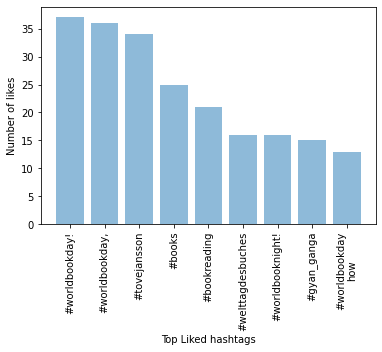

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3009 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2965 missing from current font.
  font.set_text

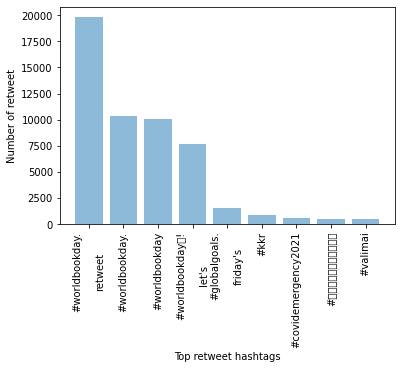

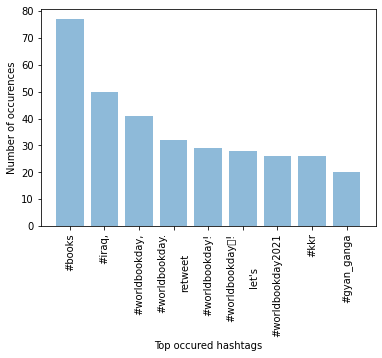

In [ ]:
from matplotlib import pyplot as plt

def makeplot(d1,x_label,y_label):
  x=[];y=[];
  for i in d1[2:11]:
    x.append(i[0]);
    y.append(i[1]);
  plt.bar(x,y,align="center",alpha=0.5);
  plt.ylabel(y_label);
  plt.xlabel(x_label);
  plt.xticks(x)
  plt.xticks(rotation = 90)
  plt.show()

makeplot(toplikes, "Top Liked hashtags","Number of likes");
makeplot(topretweet, "Top retweet hashtags","Number of retweet");
makeplot(sortedtop10, "Top occured hashtags","Number of occurences");

In [ ]:
t1=api.get_status(1353658978840924160)
t2=api.get_status(1347032418809565184)

print(t1)
print(t2)

Status(_api=<tweepy.api.API object at 0x7fd4cb3478d0>, _json={'created_at': 'Mon Jan 25 11:00:24 +0000 2021', 'id': 1353658978840924160, 'id_str': '1353658978840924160', 'text': '@MahaCyber1 @AnilSinghvi_ @cpcybd @CPDelhi @PMOIndia \n9718201526 this number whatsapp calling me from #fraudloanapp… https://t.co/7FKoEfcftH', 'truncated': True, 'entities': {'hashtags': [{'text': 'fraudloanapp', 'indices': [102, 115]}], 'symbols': [], 'user_mentions': [{'screen_name': 'MahaCyber1', 'name': 'Maharashtra Cyber', 'id': 913298364275367936, 'id_str': '913298364275367936', 'indices': [0, 11]}, {'screen_name': 'AnilSinghvi_', 'name': 'Anil Singhvi Zee Business', 'id': 387526400, 'id_str': '387526400', 'indices': [12, 25]}, {'screen_name': 'cpcybd', 'name': 'CP Cyberabad', 'id': 3191933342, 'id_str': '3191933342', 'indices': [26, 33]}, {'screen_name': 'CPDelhi', 'name': 'CP Delhi #DilKiPolice', 'id': 626218913, 'id_str': '626218913', 'indices': [34, 42]}, {'screen_name': 'PMOIndia', 'name': 'PMO Ind

In [ ]:
#Collecting data for most occured
sortedmost={};
for i in sortedtop10[2:12]:
  hashtag=i[0];
  l1=[];
  for i in tw.Cursor(api.search, q=hashtag).items(1000):
    if(i.lang=='en'):
      l1.append(i);
  sortedmost[hashtag]=l1;

In [ ]:
with open('mostoccured.pickle', 'wb') as write:
    pickle.dump(sortedmost, write, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('mostoccured.pickle', 'rb') as read: 
     sortedmost= pickle.load(read)

In [ ]:
#Collect data for most liked hashtags
sortedmostliked={};
for i in toplikes[2:12]:
  hashtag=i[0];
  l1=[];
  for i in tw.Cursor(api.search, q=hashtag).items(1000):
    if(i.lang=='en'):
      l1.append(i);
  sortedmostliked[hashtag]=l1;

In [ ]:
with open('mostliked.pickle', 'wb') as write:
    pickle.dump(sortedmostliked, write, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('mostliked.pickle', 'rb') as read: 
     sortedmostliked= pickle.load(read)

In [ ]:
print(len(sortedmost));
data1=[]
for i in sortedmost:
  for j in sortedmost[i]:
    data1.append(j.id_str);
dataframe1=pd.DataFrame(data=data1, columns=['ID']);
dataframe1.head()

10


,ID
0,1385523951074381824
1,1385523948062973956
2,1385523944908804097
3,1385523943172280321
4,1385523930694258688


In [ ]:
dataframe1.to_csv("sortedmost.csv")

In [ ]:
data2=[];
for i in sortedmostliked:
  for j in sortedmostliked[i]:
    data2.append(j.id_str);
dataframe1=pd.DataFrame(data=data2,columns=['ID']);
dataframe1.head()

,ID
0,1385536554894958600
1,1385536548758646784
2,1385536543931072516
3,1385536539434921985
4,1385536528009502724


In [ ]:
dataframe1.to_csv("mostliked.csv")

In [ ]:
#Collected data for most retweeted hashtags:
sortedretweet={};
for i in topretweet[2:12]:
  hashtag=i[0];
  l1=[];
  for i in tw.Cursor(api.search, q=hashtag).items(1000):
    if(i.lang=='en'):
      l1.append(i);
  sortedretweet[hashtag]=l1;

In [ ]:
with open('sortedretweet.pickle', 'wb') as write:
    pickle.dump(sortedretweet, write, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('sortedretweet.pickle', 'rb') as read: 
     sortedretweet= pickle.load(read)

In [ ]:
data2=[];
for i in sortedretweet:
  for j in sortedretweet[i]:
    data2.append(j.id_str);
dataframe1=pd.DataFrame(data=data2,columns=['ID']);
dataframe1.head()

,ID
0,1385540271400755201
1,1385539877341581315
2,1385539652682088451
3,1385539449694609408
4,1385539445701677056


In [ ]:
dataframe1.to_csv("mostretweet.csv")

In [ ]:
def coeff(hashes, dic):
    tweets = dic[hashes];
    retweet = 0
    for i in tweets:
      if(i.text[:2]=='RT'):
        retweet+=1;
    R = retweet / 10
    user_name = {}
    for i in tweets:
        name = i.user.screen_name
        if(name not in user_name):
            user_name[name] = 0
        user_name[name] += 1
    top50 = (sorted(user_name.items(), reverse=True,
                    key=lambda item: item[1]));
    top50_1 = top50[:50];
    usercounts = 0
    for i in top50_1:
        usercounts += i[1]
    F = usercounts / 10
    frequencyoftweets = []
    for i in top50:
        frequencyoftweets.append(i[1])
    if(len(frequencyoftweets)==0):
      u=0;
    else:
       u = sum(frequencyoftweets) / len(frequencyoftweets)
    l1=[hashes, R, F, u, (R/10)+F+u];
    return l1;


In [ ]:
def displaycoefficient(dic):
  l2=[];
  for i in dic.keys():
    l1=coeff(i, dic);
    l2.append(l1);
  df2 = pd.DataFrame(data=l2, columns=['Hashtag','R','F','U','Coefficient'])
  print(df2)
print("Table for most liked hashtags");
displaycoefficient(sortedmostliked)


Table for most liked hashtags
              Hashtag     R     F         U  Coefficient
0       #worldbookday  44.5  15.7  1.222222    21.372222
1      #worldbookday!  45.4  15.7  1.217647    21.457647
2      #worldbookday,  45.9  16.0  1.226378    21.816378
3        #tovejansson   3.5   4.8  1.142857     6.292857
4              #books  58.1  17.0  1.191819    24.001819
5        #bookreading   2.1   6.2  1.160000     7.570000
6   #welttagdesbuches   2.8   4.9  1.020833     6.200833
7    #worldbooknight!  58.8  22.0  1.328398    29.208398
8         #gyan_ganga   9.0   7.8  1.291667     9.991667
9  #worldbookday\nhow  75.9  11.6  1.076754    20.266754


In [ ]:
print("Table for most retweeted hashtags");
displaycoefficient(sortedretweet)

Table for most retweeted hashtags
                     Hashtag    R    F         U  Coefficient
0  #worldbookday.\n\nretweet  9.7  5.0  1.000000     6.970000
1             #worldbookday.  5.8  6.2  1.218182     7.998182
2              #worldbookday  5.9  6.2  1.214286     8.004286
3   #worldbookday📚!\n\nlet's  8.0  5.4  1.042553     7.242553
4  #globalgoals.\n\nfriday's  9.9  5.0  1.000000     6.990000
5                       #kkr  6.9  6.2  1.155844     8.045844
6        #covidemergency2021  6.5  5.2  1.027778     6.877778
7               #புத்தகதினம்  0.0  0.0  0.000000     0.000000
8                   #valimai  3.7  3.9  1.772727     6.042727
9             #worldbookday,  5.0  6.1  1.215686     7.815686


In [ ]:
print("Table for most occured hashtags");
displaycoefficient(sortedmost)

Table for most occured hashtags
                     Hashtag     R     F         U  Coefficient
0             #worldbookday.  41.8  11.8  1.133072    17.113072
1                     #books  51.2  16.0  1.172965    22.292965
2                     #iraq,  86.5   8.2  1.035088    17.885088
3             #worldbookday,  39.4  11.2  1.124000    16.264000
4  #worldbookday.\n\nretweet  96.3   5.8  1.008089    16.438089
5             #worldbookday!  42.4  14.7  1.215292    20.155292
6   #worldbookday📚!\n\nlet's  84.9   8.3  1.034375    17.824375
7          #worldbookday2021  40.8   9.1  1.075092    14.255092
8                       #kkr  65.9  26.7  1.562069    34.852069
9                #gyan_ganga   8.6   7.8  1.304348     9.964348
